<a href="https://colab.research.google.com/github/RadhikaRM/Bookrecommendersystem/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Importing necessary libraries
import numpy as np
import pandas as pd
# Adjusting display options for pandas
pd.set_option("display.max_colwidth", 1000)
# Data visualization libraries
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
# Library for working with images
from PIL import Image
# Libraries for word cloud creation
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
# Setting plot size
plt.rcParams["figure.figsize"] = (8, 8)
# Importing libraries for displaying images and HTML content
from IPython.display import Image as IPImage, HTML as IPHTML

from tabulate import tabulate


In [40]:
# #loading the required datasets
books_df = pd.read_csv('Books.csv')
rating_df = pd.read_csv('Users.csv')
users_df = pd.read_csv('Ratings.csv')



<ipython-input-40-3c79dfac9934>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


In [45]:
# Displaying the first 10 rows of the users_df DataFrame
users_df.head(10)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [43]:
# Displaying the first 10 rows of the books_df DataFrame
books_df.head(10)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.LZZZZZZZ.jpg
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.LZZZZZZZ.jpg
8,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679425608.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679425608.01.LZZZZZZZ.jpg
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg


In [44]:
# Displaying the first 10 rows of the rating_df DataFrame
rating_df.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [47]:
# Printing the shapes of all the datasets: Users, Books, and Ratings
print('Shape of Users: {}, Books: {} and Ratings: {}'.format(users_df.shape, books_df.shape, rating_df.shape))


Shape of Users: (1149780, 3), Books: (271360, 8) and Ratings: (278858, 3)


In [51]:
# Printing information about the books_df DataFrame
# This includes details such as the column names, data types, and memory usage
print(books_df.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [56]:
# Getting the DataFrame information
info_table = books_df.info()

# Convert the DataFrame information to a string with tabulate
table_str = tabulate(info_table, headers='keys', tablefmt='grid')

# Printing the table
print(table_str)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB



In [58]:


# Getting the summary statistics of the books_df DataFrame
summary_stats = books_df.describe()

# Convert the summary statistics to a string with tabulate
table_str = tabulate(summary_stats, headers='keys', tablefmt='grid')

# Printing the table
print(table_str)


+--------+------------------+----------------+-----------------+-----------------------+-------------+--------------------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------+
|        |             ISBN | Book-Title     | Book-Author     |   Year-Of-Publication | Publisher   | Image-URL-S                                                  | Image-URL-M                                                  | Image-URL-L                                                  |
+========+==================+================+=================+=======================+=============+==============================================================+==============================================================+==============================================================+
| count  | 271360           | 271360         | 271359          |                271360 | 271358      | 271360               

In [63]:
# Missing value percentage
from tabulate import tabulate

# Calculate the percentage of missing values in each column
missing_percentage = books_df.isnull().sum() / len(books_df) * 100

# Convert the missing percentage to a DataFrame for tabulation
missing_percentage_df = missing_percentage.to_frame().reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']

# Convert the DataFrame to a string with tabulate
table_str = tabulate(missing_percentage_df, headers='keys', tablefmt='grid', showindex=False)

# Print the table
print(table_str)


+---------------------+----------------------+
| Column              |   Missing Percentage |
+=====================+======================+
| ISBN                |          0           |
+---------------------+----------------------+
| Book-Title          |          0           |
+---------------------+----------------------+
| Book-Author         |          0.000368514 |
+---------------------+----------------------+
| Year-Of-Publication |          0           |
+---------------------+----------------------+
| Publisher           |          0.000737028 |
+---------------------+----------------------+
| Image-URL-S         |          0           |
+---------------------+----------------------+
| Image-URL-M         |          0           |
+---------------------+----------------------+
| Image-URL-L         |          0.00110554  |
+---------------------+----------------------+


In [65]:
# Checking  for  null value in book author
books_df[books_df['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [66]:
#Filling the null value
books_df.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [67]:
# Checking null values in publisher
books_df[books_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [68]:
#Replacing NaNs with correct  values
books_df.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books_df.loc[129037, 'Publisher'] = 'Bantam'

In [73]:
#insepcting the values in year of publication
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Name of few publication companies have been incorrectly put in this column.There are values such as 0 ,2024,2030 etc. which is also not possible .Let's rectify these mistakes

In [74]:
# correcting this error
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [75]:
# on searching for these  books we came to know about its authors
#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [76]:
#checking the rows having 'Gallimard' as yearOfPublication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [77]:
books_df.loc[books_df.ISBN=='2070426769','Year-Of-Publication']=2003
books_df.loc[books_df.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.loc[books_df.ISBN=='2070426769','Publisher']='Gallimard'
books_df.loc[books_df.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [78]:
#Checking if the corrections are in place
books_df.loc[books_df['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [79]:
# changing dtype of year of publication
books_df['Year-Of-Publication'] =books_df['Year-Of-Publication'].astype(int)

In [80]:
# something is off about years of publication like:
books_df[(books_df['Year-Of-Publication'] > 0) & (books_df['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [81]:
#replacing with correct  values
books_df.loc[books_df.ISBN=='	9643112136','Year-Of-Publication'] = 2010
books_df.loc[books_df.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [82]:
#Sustituting np.Nan in rows with year=0 or  greater than the current year,2022.
books_df.loc[(books_df['Year-Of-Publication'] > 2022) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

# replacing NaN values with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(int(books_df['Year-Of-Publication'].median()), inplace=True)

In [85]:
books_df['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102022, dtype: int64

In [86]:
books_df['Publisher'].value_counts()

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16804, dtype: int64

In [88]:
#Uppercasing the ISBN numbers
books_df['ISBN']=books_df['ISBN'].str.upper()

In [92]:
books_df[books_df['Book-Title']=='Jasper']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
16287,097089726X,Jasper,Michelle Groce,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg
16298,097089726X,Jasper,Michelle Groce,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg


In [93]:
#Checking for duplicates in books_df
books_df[books_df.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),Nathaniel Hawthorne,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.LZZZZZZZ.jpg
16298,097089726X,Jasper,Michelle Groce,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg
19266,039592720X,Interpreter of Maladies,Jhumpa Lahiri,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.LZZZZZZZ.jpg
22339,042512164X,Capital Crimes,Lawrence Sanders,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. Ron Hubbard,1995.0,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.LZZZZZZZ.jpg
269297,055215038X,The Sleeper,Gillian White,2003.0,Corgi Books,http://images.amazon.com/images/P/055215038X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.LZZZZZZZ.jpg
269552,037376099X,"Patient Nurse (Man Of The Month) (Harlequin Desire, No 1099)",Diana Palmer,1997.0,Silhouette,http://images.amazon.com/images/P/037376099X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.LZZZZZZZ.jpg
270285,189481505X,I-O,Simon Logan,2002.0,Prime (OH),http://images.amazon.com/images/P/189481505X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.LZZZZZZZ.jpg


In [94]:
#Dropping the rows with the entire column values are duplicated
books_df.drop_duplicates(keep="first",inplace=True)
books_df.reset_index(drop=True,inplace=True)

In [95]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users_df.head(10),users_df.tail(10)],axis=0)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [96]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Violin plot showing distribution of ages
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='Age', data=users_df, inner='quartile')

# Boxplot of Age column
plt.subplot(1, 2, 2)
sns.boxplot(x='Age', data=users_df)

plt.show()

In [ ]:
#replacing the outliers in 'Age' with NaN value
users_df.loc[(users_df['Age']>95)|(users_df['Age']<4),'Age']=np.nan

In [ ]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',users_df['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users_df['Age'].describe()

In [ ]:
# create a normal distribution pd.Series to fill Nan values with
normal_age_series = pd.Series(np.random.normal(loc=users_df.Age.mean(), scale=users_df.Age.std(), size=users_df[users_df.Age.isna()]['User-ID'].count()))

# take the absolute value of temp_age_series
abs_age_series=round(np.abs(normal_age_series),0)

# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
users_df = users_df.sort_values('Age',na_position='first').reset_index(drop=True)
users_df.Age.fillna(abs_age_series, inplace = True)


In [ ]:
#after imputation
users_df.Age.describe()

count    278858.000000
mean         34.744504
std          13.567871
min           0.000000
25%          25.000000
50%          33.000000
75%          44.000000
max          99.000000
Name: Age, dtype: float64

In [ ]:
#percentage of missing values in 'Age' column
(users_df['Age'].isnull().sum()/len(users_df))*100


0.0

In [ ]:
def age_group(age):
  '''
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [ ]:
users_df['Age_group']=users_df['Age'].apply(lambda x: age_group(x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


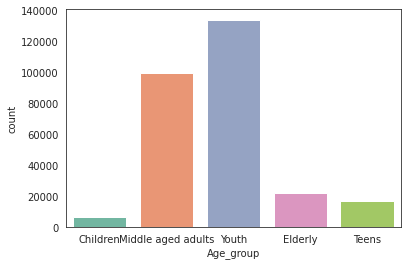

In [ ]:
#Age distribution of users
sns.countplot(users_df['Age_group'],palette='Set2')

In [ ]:
#number of unique values in 'Location'
users_df['Location'].nunique()

57339

In [ ]:
#extracting the country names from users_df
for i in users_df:
    users_df['Country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
#Displaying the country names
set(users_df['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn wÃ¼rtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedÃ\xa0',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c',
 'ca

In [ ]:
#correcting the mispelled country names
users_df.loc[users_df['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users_df.loc[users_df['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users_df.loc[users_df['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'
users_df.loc[users_df['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'
users_df.loc[users_df['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users_df.loc[users_df['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users_df.loc[users_df['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users_df['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'],
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)



In [ ]:
#Converting the country names to uppercase
users_df['Country']=users_df['Country'].str.upper()

In [ ]:
#Dropping the column 'Location'
users_df.drop('Location',axis=1,inplace=True)

In [ ]:
users_df.columns

Index(['User-ID', 'Age', 'Age_group', 'Country'], dtype='object')

In [ ]:
users_df.Country.value_counts()

USA               139746
CANADA             21658
UK                 18565
GERMANY            17074
SPAIN              13258
                   ...  
THAILOAND              1
ROSARIO                1
BURKINAFASU            1
ADSGFDR                1
SAN BERNARDINO         1
Name: Country, Length: 464, dtype: int64

In [ ]:
#displaying the first 5 rows
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# checking null values
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating_df['User-ID'].nunique(), rating_df['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556


In [ ]:
# making all the ISBN no. uppercase
rating_df['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [ ]:
# checking for duplicates
rating_df[rating_df.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [ ]:
# lets see if all the books in rating_df are also in books_df
rating_df_new = rating_df[rating_df['ISBN'].isin(books_df['ISBN'])]

In [ ]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating_df.shape, rating_df_new.shape))

Shape of rating_df: (1149780, 3) and rating_df_new: (1030617, 3)


In [ ]:
# book ratings
rating_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374


In [ ]:
# most popular books
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585


In [ ]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [ ]:
# most purchased books including the implicitely rated books
rating_df_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [ ]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
118,0671027360,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg
305,044023722X,A Painted House,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.LZZZZZZZ.jpg
356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
1922,067976402X,Snow Falling on Cedars,David Guterson,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.LZZZZZZZ.jpg


In [ ]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


In [ ]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg


In [ ]:
# for the rating dataset, we are only taking the explicit rating dataset

books_rating_df = pd.merge(books_df, explicit_rating, on='ISBN', how='inner')
df = pd.merge(books_rating_df, users_df, on='User-ID', how='inner')

In [ ]:
#shape of the merged dataframe 'df'
df.shape

(383693, 13)

In [ ]:
#displaying the top 3 rows of df
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,48.0,Middle aged adults,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg,8,5,48.0,Middle aged adults,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg,8,5,48.0,Middle aged adults,CANADA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383693 entries, 0 to 383692
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383693 non-null  object 
 1   Book-Title           383693 non-null  object 
 2   Book-Author          383693 non-null  object 
 3   Year-Of-Publication  383693 non-null  float64
 4   Publisher            383693 non-null  object 
 5   Image-URL-S          383693 non-null  object 
 6   Image-URL-M          383693 non-null  object 
 7   Image-URL-L          383692 non-null  object 
 8   User-ID              383693 non-null  int64  
 9   Book-Rating          383693 non-null  int64  
 10  Age                  383693 non-null  float64
 11  Age_group            383693 non-null  object 
 12  Country              383693 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 41.0+ MB


In [ ]:
#Number of users who have rated the books
df['User-ID'].nunique()

68080

In [ ]:
#Number of books in the dataframe
df['ISBN'].nunique()

149655

## **Exploratory Data Analysis**

In [ ]:
#Age distribution of users
age_df=users_df[users_df['User-ID'].isin(list(df['User-ID'].unique()))]
sns.distplot(age_df.Age)

In [ ]:
#Rating distribution for explicit rating

sns.countplot(x='Book-Rating',data=df,palette='Set2')

In [ ]:
fig=plt.figure(figsize=(12,8))
#Authored the most number of  books
plt.subplot(1,2,1)
popular_authors=books_df.groupby('Book-Author')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')
plt.title('Top ten writers in terms of number of books published')

#Best selling authors
plt.subplot(1,2,2)
best_selling_authors=df.groupby('Book-Author')['User-ID'].nunique().nlargest(10)
sns.barplot(x=best_selling_authors.values,y=best_selling_authors.index,palette='Paired')
plt.title('Best selling authors')
plt.tight_layout()

In [ ]:
df.groupby('Book-Title')['User-ID'].count().nlargest(10)

Book-Title
The Lovely Bones: A Novel                           707
Wild Animus                                         581
The Da Vinci Code                                   494
The Secret Life of Bees                             406
The Nanny Diaries: A Novel                          393
The Red Tent (Bestselling Backlist)                 383
Bridget Jones's Diary                               377
A Painted House                                     365
Life of Pi                                          336
Harry Potter and the Chamber of Secrets (Book 2)    326
Name: User-ID, dtype: int64

In [ ]:
#Top selling books
most_purchased_books=df.groupby('Book-Title')['User-ID'].nunique().nlargest(10)
sns.barplot(x=most_purchased_books.values,y=most_purchased_books.index,palette='Paired')
plt.title('Top selling books')

In [ ]:
#Top-rated books
top_rated_books=df.groupby('Book-Title')['Book-Rating'].sum().nlargest(10)
sns.barplot(x=top_rated_books.values,y=top_rated_books.index,palette='Paired')
plt.title('Top rated books')

In [ ]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=df.loc[df['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index()
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1

plt.tight_layout()